In [1]:
import os
from osgeo import gdal, osr
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import xarray as xr
import geopandas as gpd
import rioxarray as rxr
import rasterio
import json
from dem_utils_import import load_json, plot_rast
from fundamental_functions_import import crop_raster

C:\Users\montse\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\geopandas\_compat.py:112: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  warnings.warn(


In [2]:
dem_path = '../inputs/dem_saetde.tif'
file_path = '../inputs/sru_data/sru_saetde.json'
cropped_dem = '../outputs/rasters/cropped_dem.tif'
out_file_path = '../outputs/check_sru/test_sru3.tif'

In [3]:
file_to_test = load_json.load_json_file(file_path)
value1 = np.array(file_to_test[0]['geometry']['coordinates'])
value1 = value1[0, 0, :, :]
value1.shape

KeyError: 0

In [4]:
shape_1 = file_to_test[0]
shape_path = '../outputs/check_sru/shape1.geojson'
with open(shape_path, 'w') as shape:
  json.dump(shape_1, shape)

KeyError: 0

In [5]:
shape = load_json.load_json_file(shape_path)

NameError: name 'shape_path' is not defined

In [ ]:
crop_raster.mask_by_shape(cropped_dem, shape_path, out_file_path)

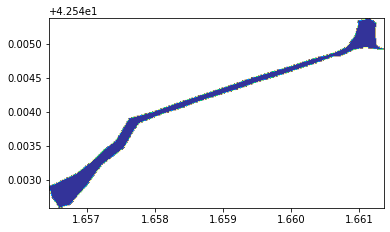

In [ ]:
plot_rast.quick_show_rasterio(out_file_path)

In [ ]:
dem = gdal.Open('../outputs/rasters/cropped_dem.tif')

In [ ]:

proj2 = dem.GetProjection()

srs = osr.SpatialReference(wkt=proj2)
if srs.IsProjected:
  print(srs.GetAttrValue('projcs'))
print(srs.GetAttrValue('geogcs'))


None
WGS 84


In [ ]:
dem4 = rxr.open_rasterio('../outputs/rasters/cropped_dem.tif')
dem4

<xarray.DataArray (band: 1, y: 3982, x: 8463)>
[33699666 values with dtype=float32]
Coordinates:
  * band         (band) int32 1
  * x            (x) float64 1.645 1.645 1.645 1.645 ... 1.734 1.734 1.734 1.734
  * y            (y) float64 42.56 42.56 42.56 42.56 ... 42.52 42.52 42.52 42.52
    spatial_ref  int32 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0

In [ ]:
dem_crop = rxr.open_rasterio(out_file_path)
dem_crop

<xarray.DataArray (band: 1, y: 264, x: 466)>
[123024 values with dtype=float32]
Coordinates:
  * band         (band) int32 1
  * x            (x) float64 1.656 1.656 1.656 1.656 ... 1.661 1.661 1.661 1.661
  * y            (y) float64 42.55 42.55 42.55 42.55 ... 42.54 42.54 42.54 42.54
    spatial_ref  int32 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0

In [6]:
rast_crop = gdal.Open(out_file_path)
gdal.Warp(out_file_path, rast_crop, dstSRS='EPSG:4326')

In [7]:
rast = gdal.Open(out_file_path)
proj = rast_crop.GetProjection()
srs = osr.SpatialReference(wkt=proj)
if srs.IsProjected:
  print(srs.GetAttrValue('projcs'))
print(srs.GetAttrValue('geogcs'))

None
WGS 84


In [ ]:
rast_array = rast.read()
np.where(rast_array != 0.)

(array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))

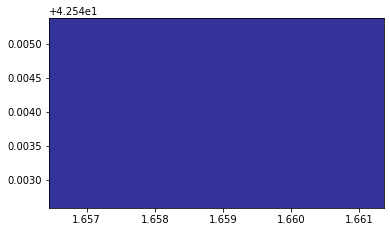

In [8]:
plot_rast.quick_show_rasterio(out_file_path)

In [12]:
file_path = '../inputs/sru_data/sru_saetde.json'
trails_sru = gpd.read_file(file_path)

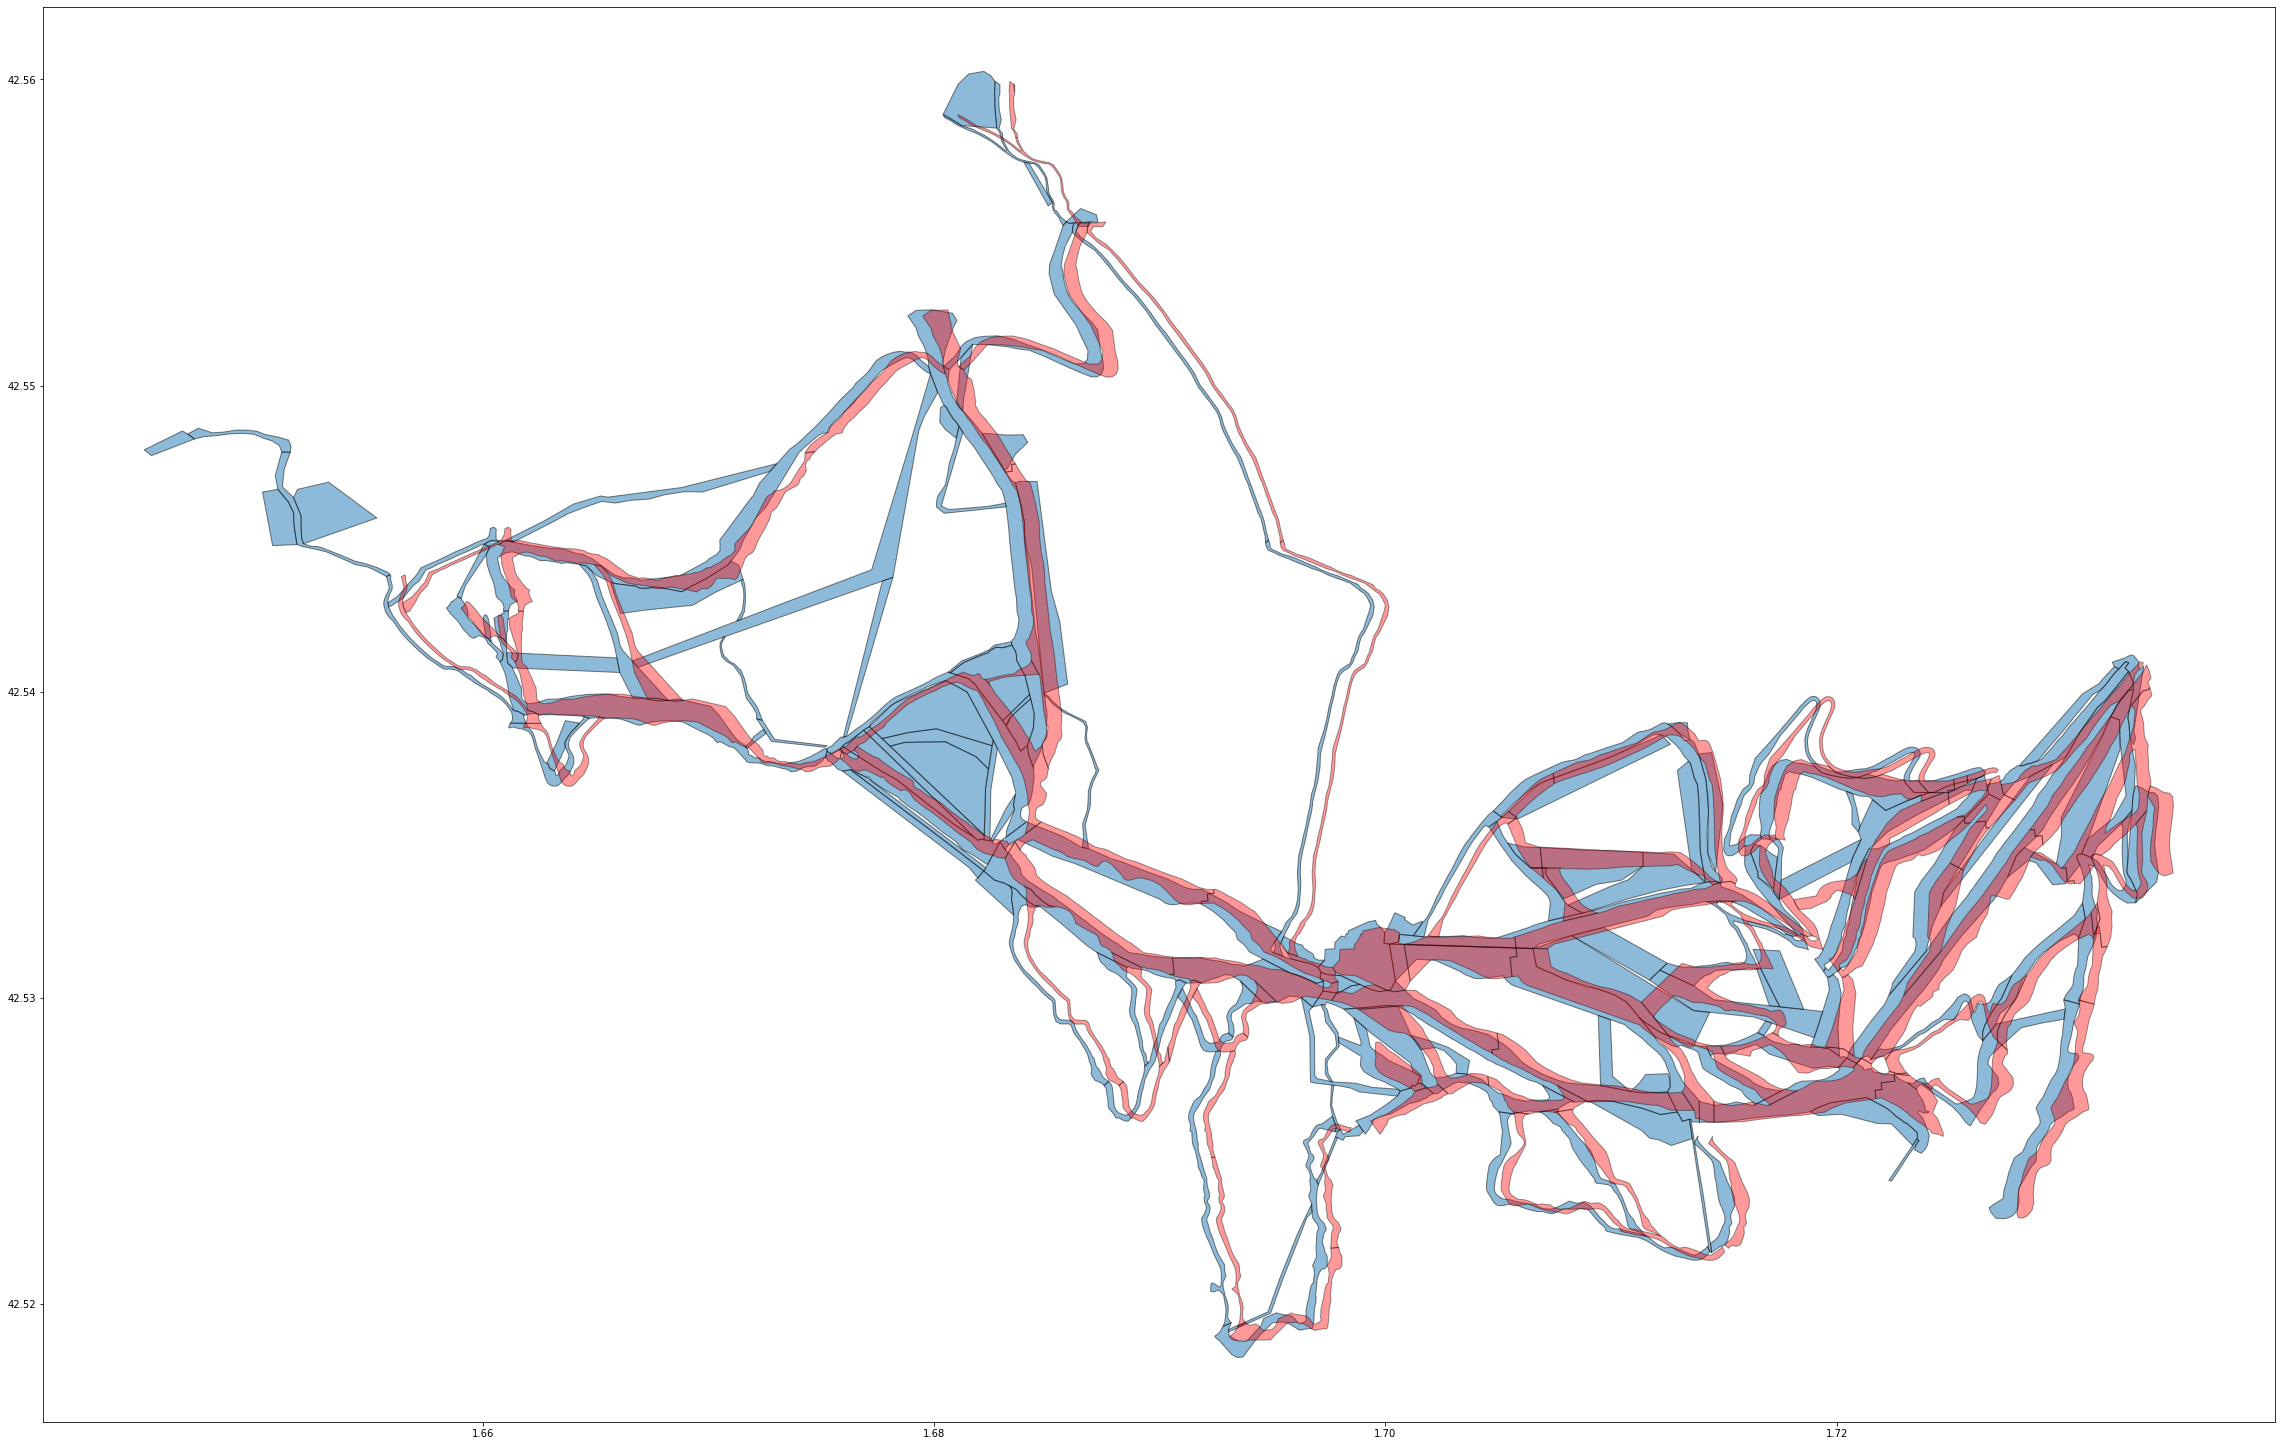

In [20]:
trails_path = '../outputs/geojson/trails_2d.shp'

rast = rasterio.open(out_file_path)
trails = gpd.read_file(trails_path)
crop_dem = rasterio.open('../outputs/rasters/cropped_dem.tif')

f, ax = plt.subplots(figsize=(40,40))
#rasterio.plot.show(rast, ax=ax, cmap='magma') #with_bounds = True, ax=ax, cmap='magma')
#rasterio.plot.show(crop_dem, ax=ax, alpha=0.2)
trails.plot(ax=ax, edgecolor = 'k', alpha=0.5)
trails_sru.plot(ax=ax, edgecolor = 'k', alpha=0.4, color='red')
plt.show()

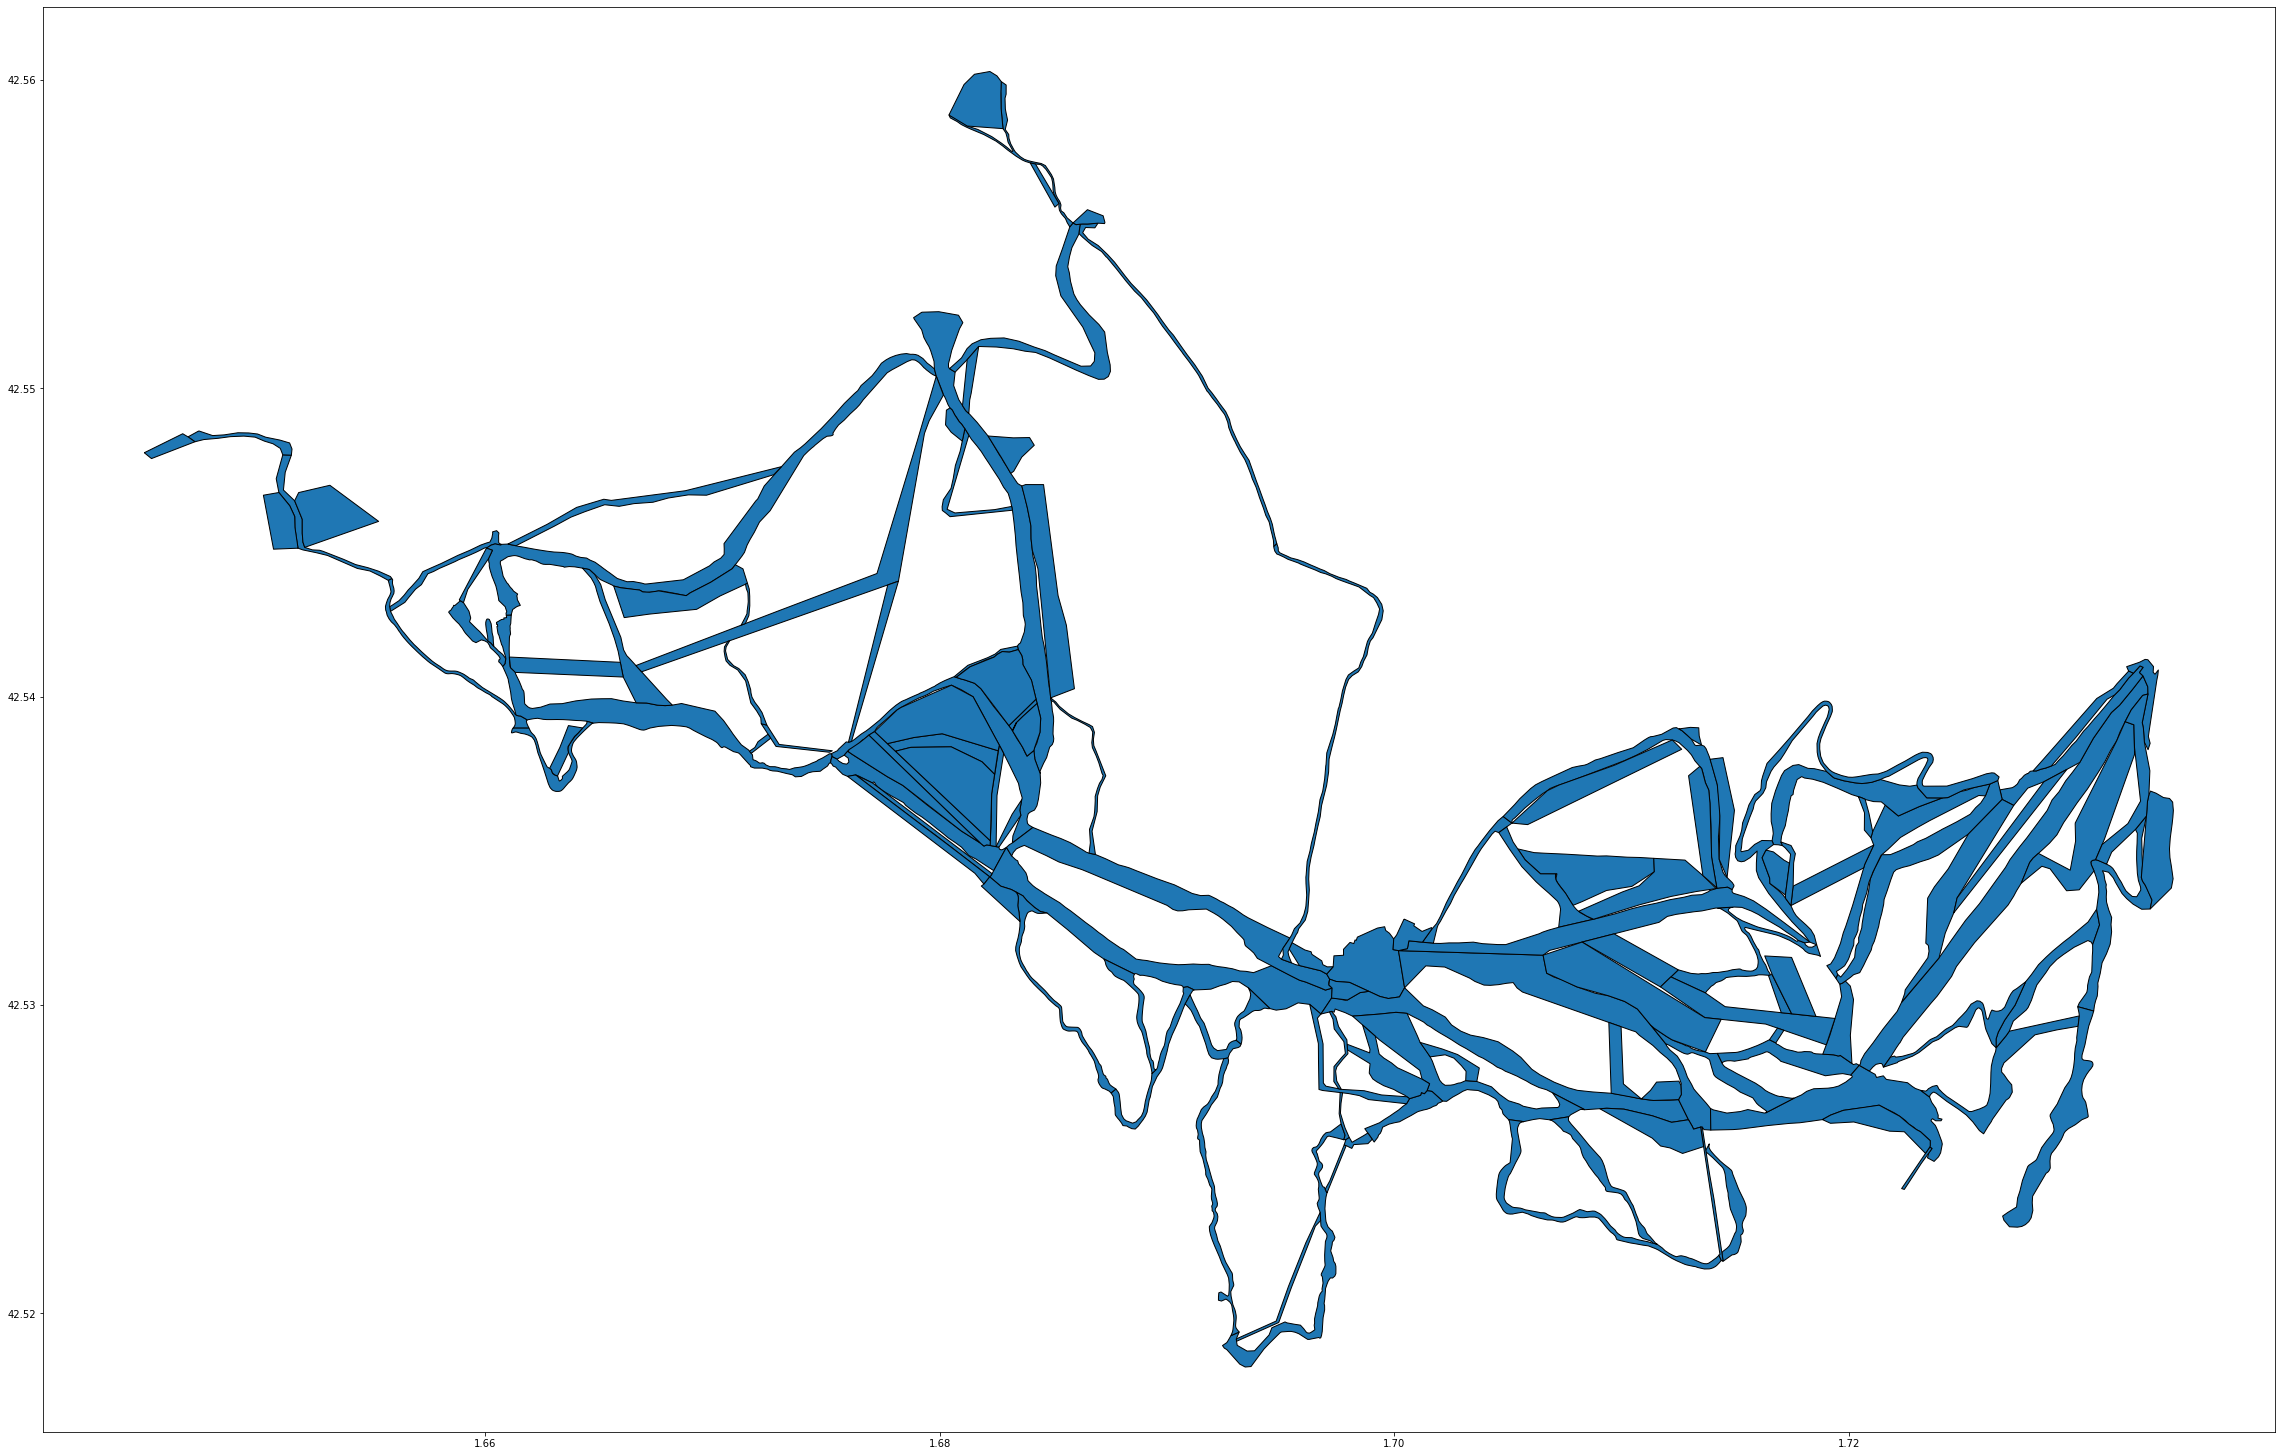

In [ ]:
f, ax = plt.subplots(figsize=(40,40))
trails.plot(ax=ax, edgecolor = 'k')
plt.show()

In [ ]:
tr = load_json.load_json_file('../outputs/geojson/trails_2d.geojson')

In [ ]:
tr['features'][100]

{'type': 'Feature',
 'properties': {'production': 0,
  'trail_name': 'Reserva neu AvÃ\xad',
  'customer': 'saetde',
  'ski_resort': 'grandvalira',
  'sector': 'cubil',
  'section': 1,
  'trail_code': None,
  'section_na': '1',
  'area_local': 11012,
  'difficulty': None,
  'type': 'snow_stock'},
 'geometry': {'type': 'MultiPolygon',
  'coordinates': [[[[1.683192485782807, 42.53889151612662],
     [1.683363297309742, 42.5391499062402],
     [1.683655943431692, 42.5393616997103],
     [1.68427686561955, 42.539776396881386],
     [1.684434463115418, 42.53930056177017],
     [1.684401392563251, 42.538840030552166],
     [1.684172800324509, 42.53835546517902],
     [1.684132783185993, 42.5382512773629],
     [1.68383388695735, 42.53806915606944],
     [1.683641472775844, 42.53835225220127],
     [1.683192485782807, 42.53889151612662],
     [1.683363297309742, 42.5391499062402],
     [1.683192485782807, 42.53889151612662]]]]}}

In [ ]:
tr['features'][50]

{'type': 'Feature',
 'properties': {'production': 0,
  'trail_name': 'Border Cross',
  'customer': 'saetde',
  'ski_resort': 'grandvalira',
  'sector': 'grau',
  'section': 1,
  'trail_code': 'border_cross',
  'section_na': '1',
  'area_local': 15616,
  'difficulty': 'easy',
  'type': 'trail'},
 'geometry': {'type': 'MultiPolygon',
  'coordinates': [[[[1.711571698798079, 42.5222370534144],
     [1.711361418041711, 42.52228743991961],
     [1.711359880267264, 42.5222949913918],
     [1.711332385597385, 42.522318326917556],
     [1.711287857808313, 42.522341566471184],
     [1.711240957821664, 42.522358852534694],
     [1.711023358858907, 42.52241090720454],
     [1.710953970151779, 42.52242617635447],
     [1.710929065197201, 42.52243431610818],
     [1.710894464344897, 42.52245059134204],
     [1.710801396264694, 42.52250856767107],
     [1.710762834822082, 42.52255497107721],
     [1.710737650963267, 42.522601989918556],
     [1.710679687034405, 42.522807406766766],
     [1.7106296183